# Final Project Submission - Movie Suggestions for New Microsoft Studio

* Student name: Elliot Teeman
* Student pace: Self-Paced
* Instructor name: Joe Comeaux


## Introduction

This notebook is for the final project of Data Science Phase 1. The Business question involves Microsoft looking to enter the movie industry and wanting to know what types of movies perform best at the box office. 

Below in the notebook, I have pulled data from the-numbers.com and imdb.com to answer what types of movies are performing best financially and which have increasing viewership in theaters.

## Pulling Data for Initial Review
### Importing Libraries

Libraries imported for visualizations and SQL

In [30]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Dataset

This dataset was chosen for the inclusion of budget and revenue data. Info of this dataset is shown for reference.

In [44]:
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
monthly_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

tn_df.info()
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 no

### Filtering and Converting Data

Converting date, budget and gross into usuable numbers and filtering the list to a more manageable sample. 

Movie population for review will be from dates 2010-2019 and a worldwide gross over $20mil. 
This makes a movie population close to 1200.

In [45]:

#Convert worldwide gross data from strings to floats
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace('$', '')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '').astype(float)

#Convert production budget data from strings to floats
tn_df['production_budget'] = tn_df['production_budget'].str.replace('$', '')
tn_df['production_budget'] = tn_df['production_budget'].str.replace(',', '').astype(float)

#Convert release date data from strings to ints
tn_df['release_date'] = tn_df['release_date'].str[7:12:1].astype(int)

tn_df['profit'] = tn_df['worldwide_gross'] - tn_df['production_budget']

tn_df = tn_df[tn_df['worldwide_gross'] > 20000000]

tn_df = tn_df[tn_df['release_date'] > 2009]

tn_df.info()
tn_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 1 to 5679
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1191 non-null   int64  
 1   release_date       1191 non-null   int32  
 2   movie              1191 non-null   object 
 3   production_budget  1191 non-null   float64
 4   domestic_gross     1191 non-null   object 
 5   worldwide_gross    1191 non-null   float64
 6   profit             1191 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 69.8+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,6.350639e+08
2,3,2019,Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,-2.002376e+08
3,4,2015,Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,1.072414e+09
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,9.997217e+08
5,6,2015,Star Wars Ep. VII: The Force Awakens,306000000.0,"$936,662,225",2.053311e+09,1.747311e+09


In [46]:


#Convert worldwide gross data from strings to floats
monthly_df['worldwide_gross'] = monthly_df['worldwide_gross'].str.replace('$', '')
monthly_df['worldwide_gross'] = monthly_df['worldwide_gross'].str.replace(',', '').astype(float)

#Convert production budget data from strings to floats
monthly_df['production_budget'] = monthly_df['production_budget'].str.replace('$', '')
monthly_df['production_budget'] = monthly_df['production_budget'].str.replace(',', '').astype(float)

#Convert release date data to months
monthly_df['release_date'] = monthly_df['release_date'].str[0:3:1]

monthly_df['profit'] = monthly_df['worldwide_gross'] - monthly_df['production_budget']

monthly_df = monthly_df[monthly_df['worldwide_gross'] > 20000000]

monthly_df.info()
monthly_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3236 entries, 0 to 5745
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3236 non-null   int64  
 1   release_date       3236 non-null   object 
 2   movie              3236 non-null   object 
 3   production_budget  3236 non-null   float64
 4   domestic_gross     3236 non-null   object 
 5   worldwide_gross    3236 non-null   float64
 6   profit             3236 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 202.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,Dec,Avatar,425000000.0,"$760,507,625",2.776345e+09,2.351345e+09
1,2,May,Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,6.350639e+08
2,3,Jun,Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,-2.002376e+08
3,4,May,Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,1.072414e+09
4,5,Dec,Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,9.997217e+08


### Importing SQL Data 

I will be combining this SQL data to the previous dataset to include Genre and runtime information

In [47]:
conn = sqlite3.Connection('zippedData/im.db') #connection line to explore imdb SQL

In [48]:

q = """
SELECT primary_title, start_year, genres, runtime_minutes
FROM movie_basics

;"""
sql_bas_df = pd.read_sql(q, conn)

sql_bas_df.info()
sql_bas_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   start_year       146144 non-null  int64  
 2   genres           140736 non-null  object 
 3   runtime_minutes  114405 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.5+ MB


,primary_title,start_year,genres,runtime_minutes
0,Sunghursh,2013,"Action,Crime,Drama",175.0
1,One Day Before the Rainy Season,2019,"Biography,Drama",114.0
2,The Other Side of the Wind,2018,Drama,122.0
3,Sabse Bada Sukh,2018,"Comedy,Drama",NaN
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",80.0


In [49]:
conn.close() #Close SQL connection

### Data Cleaning

Combined SQL data with existing dataframe. Many movies did not link with the SQL data. Deciding to export file for some manual cleaning. The dataframe 'combined_df' was exported to a csv where I manually cleaned some entries to aide the merge process.

In [50]:

combined_df = tn_df.merge(sql_bas_df, how='left', left_on=['movie','release_date'], right_on=['primary_title','start_year'])

combined_df.info()

combined_df.to_csv('zippedData/combined.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217 entries, 0 to 1216
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1217 non-null   int64  
 1   release_date       1217 non-null   int32  
 2   movie              1217 non-null   object 
 3   production_budget  1217 non-null   float64
 4   domestic_gross     1217 non-null   object 
 5   worldwide_gross    1217 non-null   float64
 6   profit             1217 non-null   float64
 7   primary_title      997 non-null    object 
 8   start_year         997 non-null    float64
 9   genres             995 non-null    object 
 10  runtime_minutes    992 non-null    float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 109.3+ KB


#### Combined SQL with Cleaned Data

With the imported 'cleaned_prep.csv' file, the SQL was able to merge very well with the financial information for a new combined dataframe.

In [51]:
cleaned_df = pd.read_csv('zippedData/cleaned_prep.csv')

combined2_df = cleaned_df.merge(sql_bas_df, how='left', left_on=['movie','release_date'], right_on=['primary_title','start_year'])

combined2_df.info()
combined2_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 0 to 1188
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1189 non-null   int64  
 1   release_date       1189 non-null   int64  
 2   movie              1189 non-null   object 
 3   production_budget  1189 non-null   int64  
 4   domestic_gross     1189 non-null   object 
 5   worldwide_gross    1189 non-null   int64  
 6   profit             1189 non-null   int64  
 7   profit_percentage  1189 non-null   float64
 8   primary_title      1186 non-null   object 
 9   start_year         1186 non-null   float64
 10  genres             1184 non-null   object 
 11  runtime_minutes    1179 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 120.8+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_percentage,primary_title,start_year,genres,runtime_minutes
0,22,2013,42,31000000,"$95,020,213",97470701,66470701,2.144216,42,2013.0,"Biography,Drama,Sport",128.0
1,54,2016,10 Cloverfield Lane,5000000,"$72,082,999",108286422,103286422,20.657284,10 Cloverfield Lane,2016.0,"Drama,Horror,Mystery",103.0
2,64,2018,12 Strong,35000000,"$45,819,713",71118378,36118378,1.031954,12 Strong,2018.0,"Action,Drama,History",130.0
3,18,2013,12 Years a Slave,20000000,"$56,671,993",181025343,161025343,8.051267,12 Years a Slave,2013.0,"Biography,Drama,History",134.0
4,6,2010,127 Hours,18000000,"$18,335,230",60217171,42217171,2.345398,127 Hours,2010.0,"Adventure,Biography,Drama",94.0


### Deciding How to Group Genres

The cell below shows that there was currently over 180 groupings of genre types in dataset. To keep this at a high-level,
I decided to group movies into 9 top-level genres for comparisons. The file 'combined2_df' was exported to a csv file to allow for sorting into top-level genres defined below.

<b>Genres:</b><br>
*Action/Adventure*     - Examples include Superhero movies, Star Wars, etc. <br>
*Action/Thriller*      - Movies like James Bond, Mission Impossible, etc. <br>
*Biography/Historical* - Based on real people/events, could have elements of other genres.<br>
*Comedy*               - Standard comedic movies, with little genre crossover.<br>
*Crime/Mystery*        - Heist/Drug movies and Police/Detective/Lawyer themed movies.<br>
*Drama*                - High Drama movies with little genre crossover.<br>
*Dramedy*              - Movies that cover serious topics with humerous elements.<br>
*Family/Animation*     - Family friendly movies, typically aimed at younger audiences.<br>
*Horror*               - Movies like Saw, The Quiet Place, The Purge, etc.<br>


In [52]:

combined2_df.to_csv('zippedData/merged.csv', index = False) #Exported for cleaning of Genre groups

combined2_df['genres'].value_counts()


Adventure,Animation,Comedy    77
Action,Adventure,Sci-Fi       55
Comedy                        42
Action,Adventure,Fantasy      37
Comedy,Drama,Romance          37
                              ..
Action,Drama,War               1
Drama,Music,Musical            1
Action,Comedy                  1
Family,Fantasy,Musical         1
Drama,Horror                   1
Name: genres, Length: 187, dtype: int64

#### Genre Groupings of Final Dataset 

Imported 'Final_Data.csv' as final, cleaned dataset. To replicate the charts in next section of notebook, this is the file that should be uploaded for analysis.

In [57]:
final_df = pd.read_csv('zippedData/Final_Data.csv')

final_df['genres'].value_counts() #Counts by sorted genre groups

Family/Animation        182
Drama                   159
Action/Adventure        157
Comedy                  143
Dramedy                 127
Horror                  114
Action/Thriller          93
Crime/Mystery            92
Biography/Historical     88
Name: genres, dtype: int64

## Analysis and Visualizations

In the visualizations below, we will review overall profit percentage by genre, data sets to show absolute profit by genre and viewing trends of each genre for every year in the dataset.

### Box Plot Showing Distribution of Profit by Genre

Action movies and Family/Animation have the highest budgets and profits per the plots below. Those two also have the greatest risk of a loss. Generally populations are fairly concentrated with some noted outliers. Looking at the data, many of the outliers are part of larger franchises.

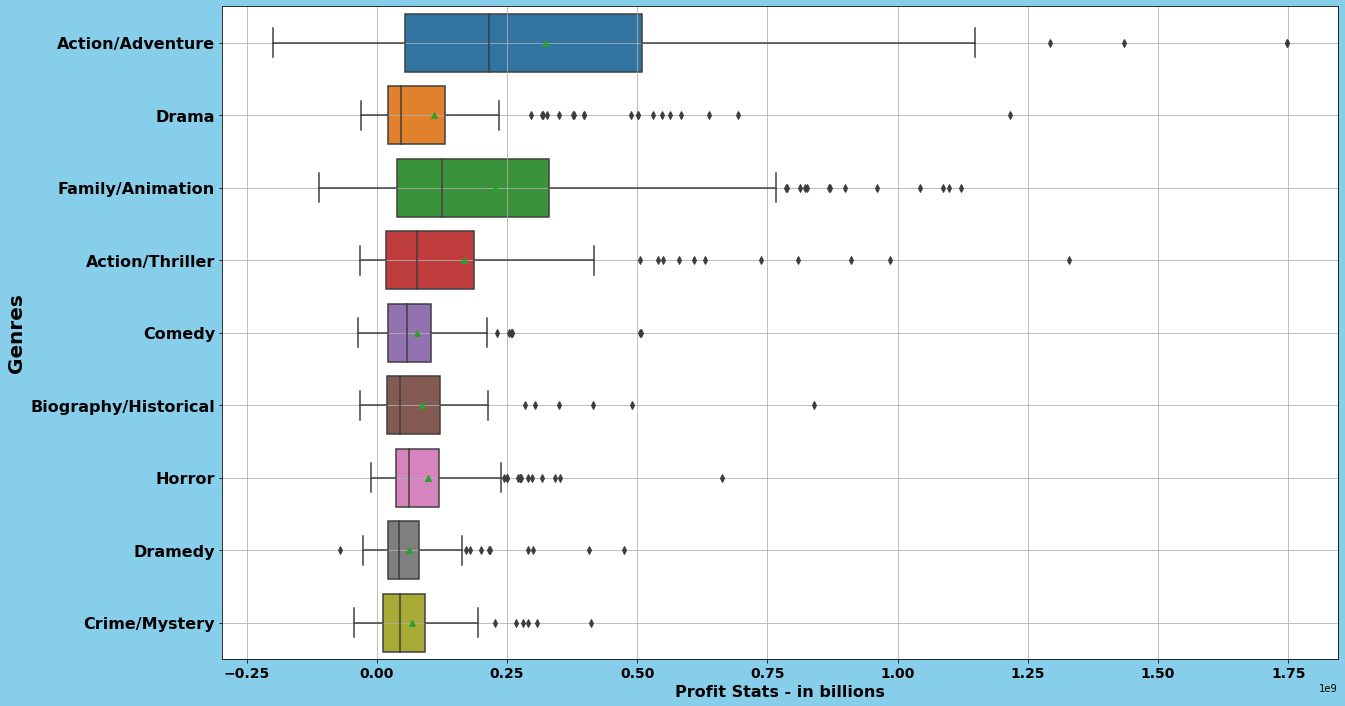

In [59]:
fig,axes = plt.subplots(figsize=(20, 12),facecolor= 'skyblue')

sns.boxplot(data=final_df, x= 'profit', y= 'genres', orient= 'h',showfliers=True,showmeans=True)
plt.xlabel("Profit Stats - in billions", fontweight= 'bold', fontsize= 16)
plt.grid()
plt.xticks(fontweight= 'bold',fontsize= 14)
plt.ylabel("Genres", fontweight= 'bold', fontsize= 20)
plt.yticks(fontweight= 'bold',fontsize= 16);

### Bar Chart Showing Profit % by Genre

Horror and Dramatic movies show the highest general profit margin base on the chart below.

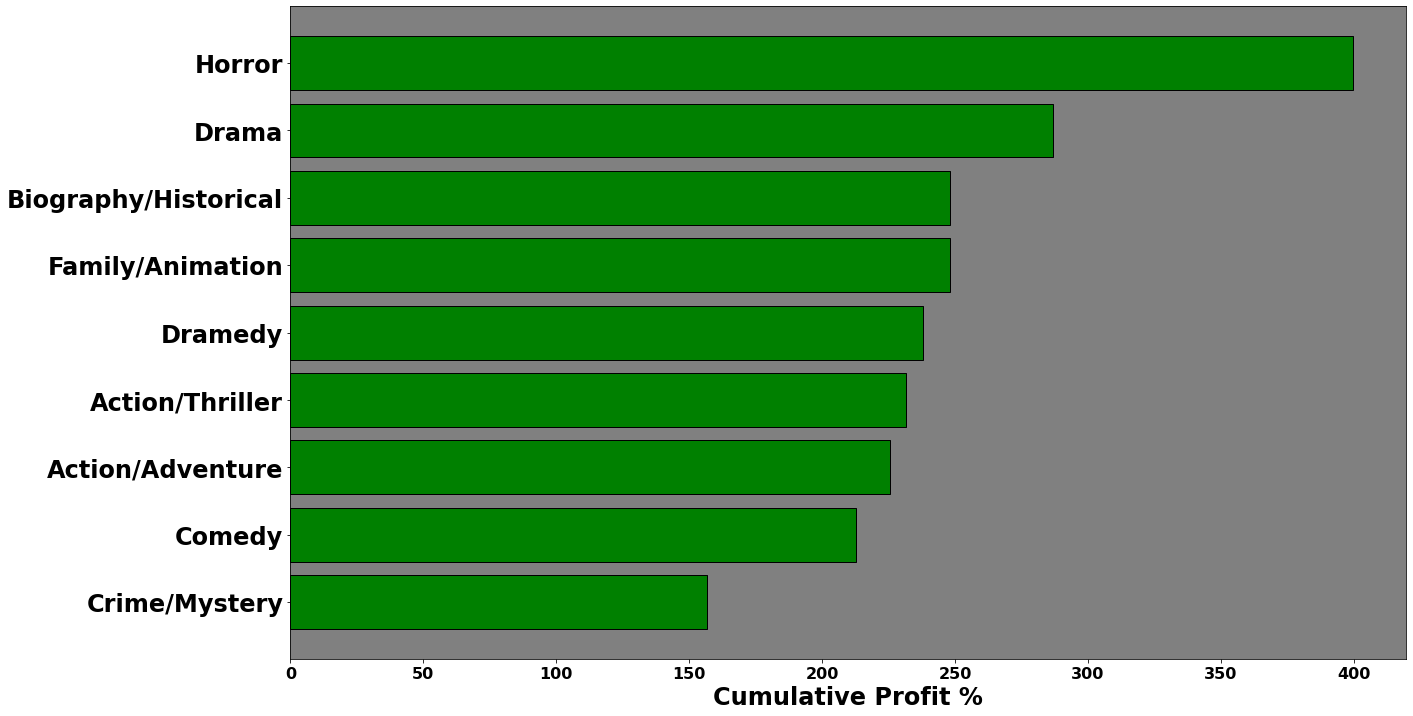

In [60]:

bygenre = final_df.groupby(['genres']).sum()
bygenre['profit_percentage'] = (bygenre['profit'] / bygenre['production_budget']) * 100

bygenre = bygenre.sort_values(by=['profit_percentage'])

x = bygenre.index  #Movie genre groups
y = bygenre['profit_percentage'] #cumulative percentage of profit

fig,ax = plt.subplots(figsize=(20, 12),facecolor='white')
ax.set_facecolor('gray')

plt.barh(x,y,edgecolor= 'black', color= 'green')
plt.xlabel('Cumulative Profit %', fontweight= 'bold', fontsize= 24)

plt.yticks(fontweight= 'bold', fontsize= 24)
plt.xticks(fontweight= 'bold', fontsize= 16)
plt.show()


### Bar Chart Showing Total Profit by Genre

Action/Adventure and Family/Animation movies show the highest general total profit in the chart below.

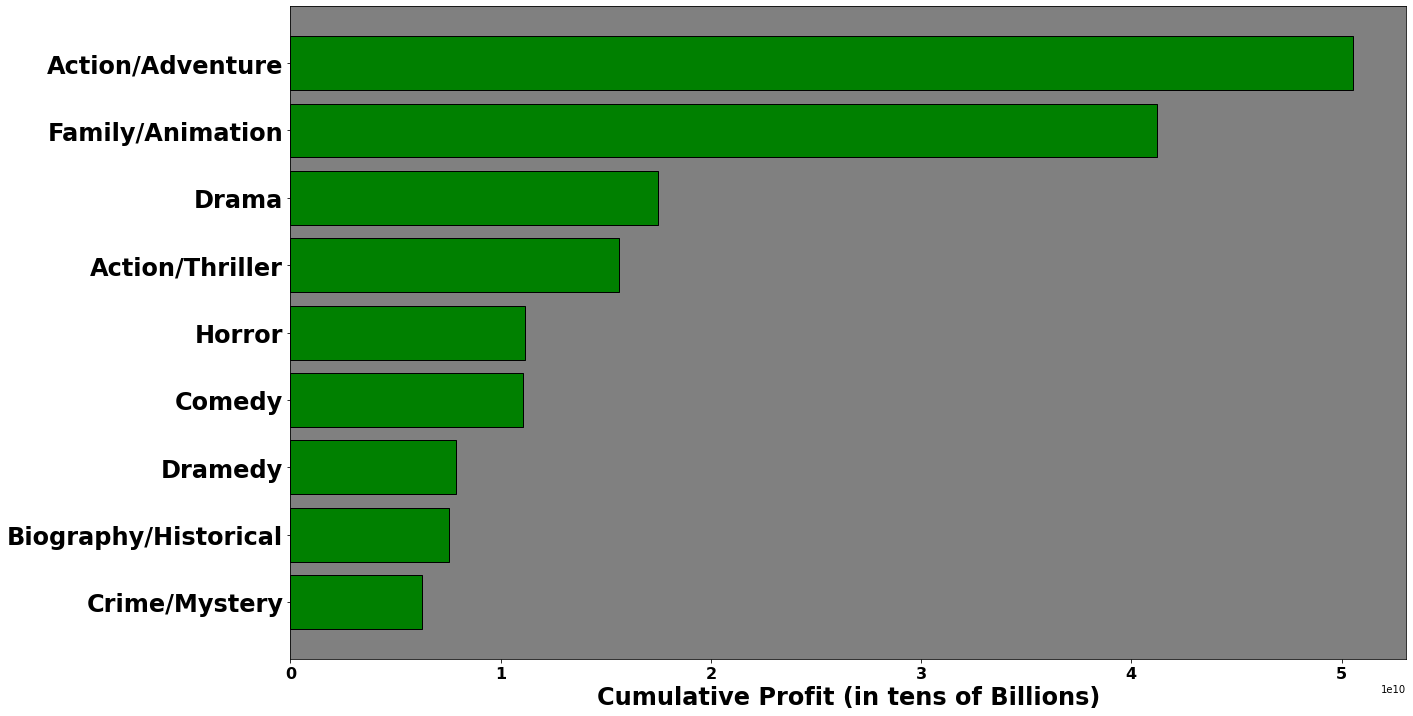

In [61]:

bygenre = bygenre.sort_values(by=['profit'])

x = bygenre.index  #Movie genre groups
y = bygenre['profit'] #total profit by genre

fig,ax = plt.subplots(figsize=(20, 12),facecolor='white')
ax.set_facecolor('gray')

plt.barh(x,y,edgecolor= 'black', color = 'green')
plt.xlabel('Cumulative Profit (in tens of Billions)', fontweight= 'bold', fontsize= 24)

plt.yticks(fontweight= 'bold', fontsize= 24)
plt.xticks(fontweight= 'bold', fontsize= 16);

### Line Plots to Show Viewing Trends by Genre

Code below creates a pivot table to pull data by genre for each year in dataset.

In [62]:
total_world = final_df.groupby(['release_date']).sum()

genre_table = pd.pivot_table(final_df, values='worldwide_gross', index='release_date',
                    columns='genres', aggfunc=np.sum)

for i in genre_table.columns:
    genre_table[i] = ((genre_table[i])/(total_world['worldwide_gross']) * 100)
    

### Viewing trends have increased for Action/Adventure, Biography/Historical, Family/Animation and Horror

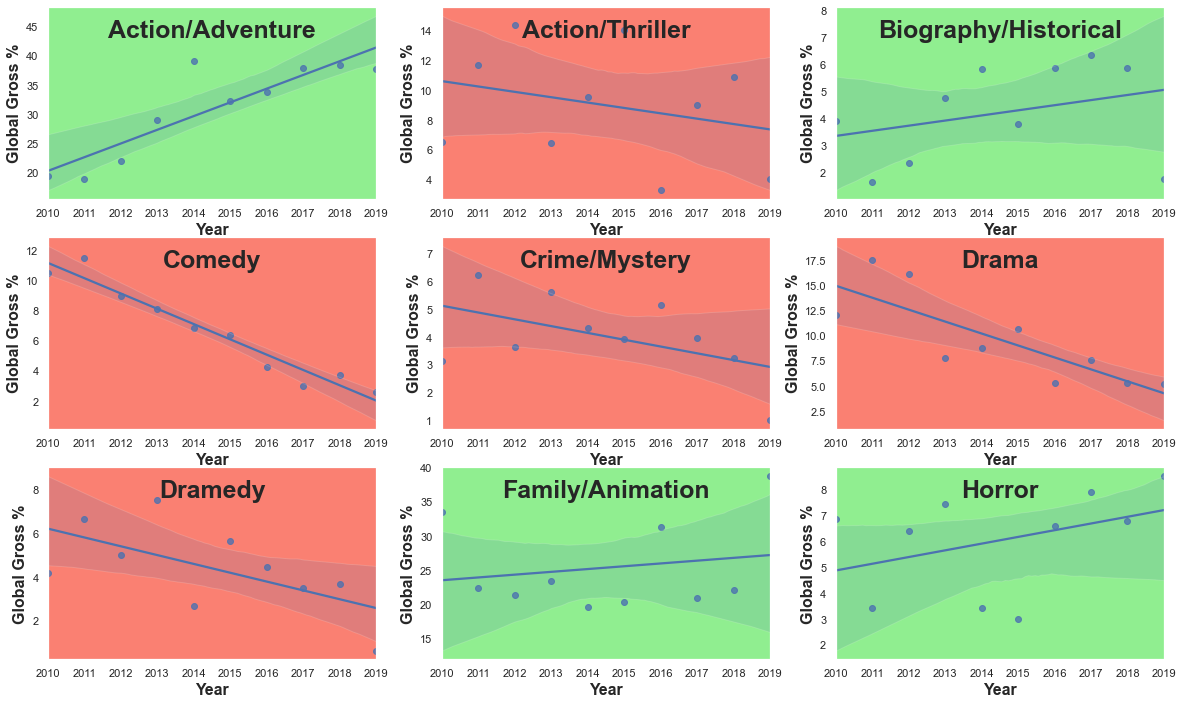

In [64]:

fig,axes = plt.subplots(figsize=(20, 12))

counter = 0                        
                        
for i in genre_table.columns:
    counter += 1
    plt.subplot(3,3,counter)
    ax = sns.regplot(x=genre_table.index, y=genre_table[i])
    sns.set(rc={'axes.facecolor':'lightgreen', 'figure.facecolor':'white'})
    plt.xlabel("Year", fontweight= 'bold', fontsize= 16)
    plt.ylabel("Global Gross %", fontweight= 'bold', fontsize= 16)
    plt.grid(False)
    ax.set_title(i, fontweight= 'bold', fontsize= 25, pad=-30)
    
    if counter in [1,3,4,5,6]:
        sns.set(rc={'axes.facecolor':'salmon', 'figure.facecolor':'white'})
    


### Bar Chart Showing Total Profit by Release Month

Releases during the summer months (May/June/July) and fall holiday months (November/December) 
have the highest average profits.

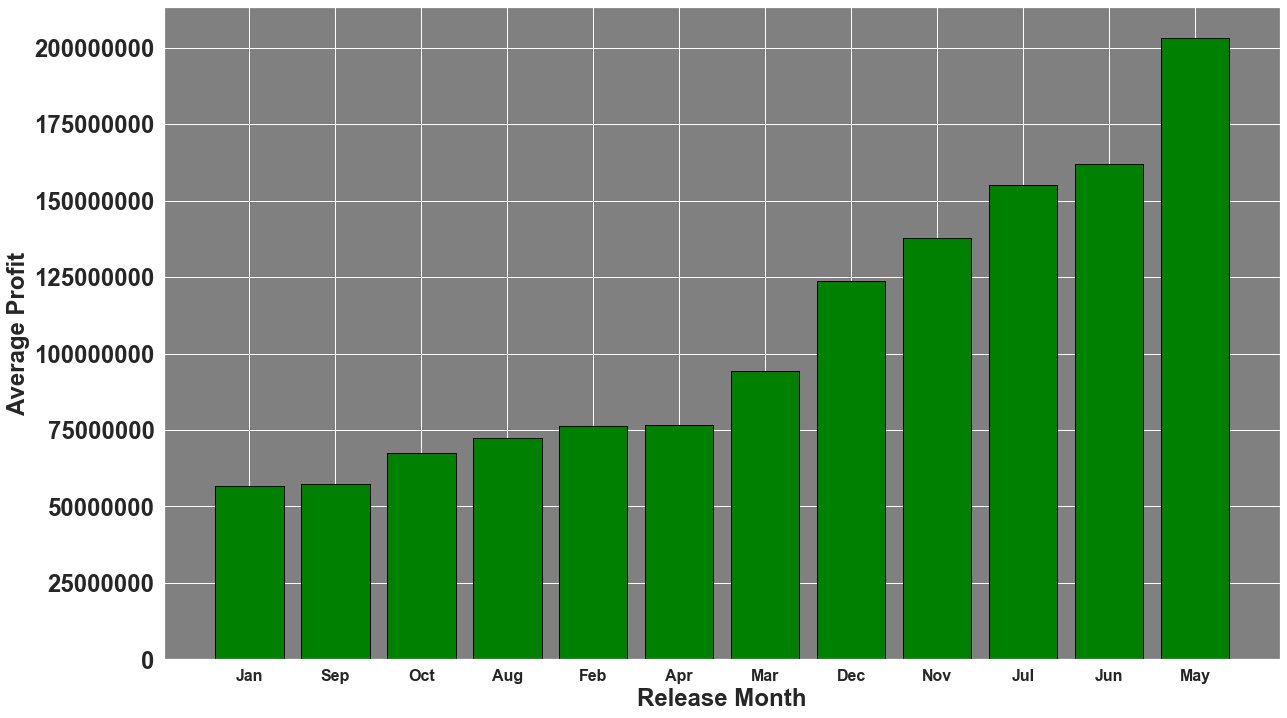

In [65]:
bymonth = monthly_df.groupby(['release_date']).mean()

bymonth = bymonth.sort_values(by=['profit'])

x = bymonth.index  #Month groups
y = bymonth['profit'] #Avergage profit

fig,ax = plt.subplots(figsize=(20, 12),facecolor='white')
ax.set_facecolor('gray')

plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.bar(x,y,edgecolor= 'black', color= 'green')
plt.ylabel('Average Profit', fontweight= 'bold', fontsize= 24)
plt.xlabel('Release Month', fontweight= 'bold', fontsize= 24)

plt.yticks(fontweight= 'bold', fontsize= 24)
plt.xticks(fontweight= 'bold', fontsize= 16);

### Scatterplot Showing Profit by Runtime

There is a small, positive correlation between runtime and profit. Better recommendations for runtime would be similar to existing averages of the dataset.

In [66]:
runfil.corr(method= 'pearson') #shows a slight, positive relationship between profit/runtime (~.263)

,id,release_date,production_budget,worldwide_gross,profit,profit_percentage,start_year,runtime_minutes
id,1.000000,0.012023,-0.137266,-0.094893,-0.075222,0.033530,0.012023,-0.044896
release_date,0.012023,1.000000,0.047329,0.087968,0.091563,0.025520,1.000000,0.089347
production_budget,-0.137266,0.047329,1.000000,0.748274,0.615666,-0.136730,0.047329,0.327080
worldwide_gross,-0.094893,0.087968,0.748274,1.000000,0.983443,0.034484,0.087968,0.296560
profit,-0.075222,0.091563,0.615666,0.983443,1.000000,0.078312,0.091563,0.262920
profit_percentage,0.033530,0.025520,-0.136730,0.034484,0.078312,1.000000,0.025520,-0.089449
start_year,0.012023,1.000000,0.047329,0.087968,0.091563,0.025520,1.000000,0.089347
runtime_minutes,-0.044896,0.089347,0.327080,0.296560,0.262920,-0.089449,0.089347,1.000000


In [67]:
runfil.describe() #Checking the distribution of runtime data

,id,release_date,production_budget,worldwide_gross,profit,profit_percentage,start_year,runtime_minutes
count,1174.000000,1174.000000,1.174000e+03,1.174000e+03,1.174000e+03,1174.000000,1174.000000,1174.000000
mean,52.189949,2013.928450,6.029456e+07,2.067499e+08,1.464553e+08,4.369757,2013.928450,110.780239
std,28.723609,2.633962,6.016450e+07,2.616181e+08,2.202453e+08,14.236901,2.633962,17.545879
min,1.000000,2010.000000,1.000000e+05,2.000561e+07,-2.002376e+08,-0.772600,2010.000000,63.000000
25%,28.000000,2012.000000,1.950000e+07,5.067026e+07,2.379847e+07,0.839172,2012.000000,98.000000
50%,53.000000,2014.000000,3.750000e+07,1.029609e+08,6.466376e+07,1.995176,2014.000000,109.000000
75%,77.000000,2016.000000,8.000000e+07,2.438785e+08,1.656285e+08,4.106901,2016.000000,121.000000
max,100.000000,2019.000000,4.106000e+08,2.053311e+09,1.748134e+09,415.564740,2019.000000,180.000000


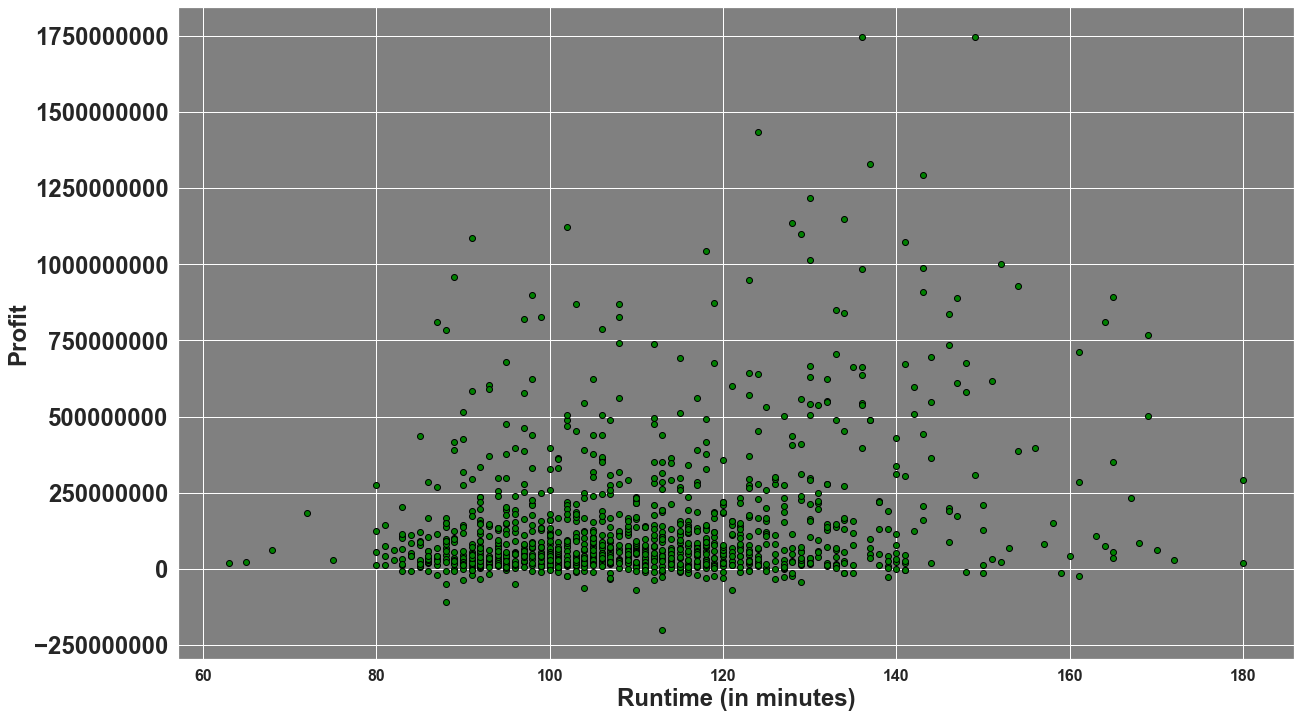

In [68]:
#Plotting the runtime data against profit

runfil = combined2_df[combined2_df['runtime_minutes'] > 60]

fig,ax = plt.subplots(figsize=(20, 12),facecolor='white')
ax.set_facecolor('gray')

x = runfil['runtime_minutes']  #Runtime
y = runfil['profit'] #Profit

plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.scatter(x,y,edgecolor= 'black', color= 'green')

plt.ylabel('Profit', fontweight= 'bold', fontsize= 24)
plt.xlabel('Runtime (in minutes)', fontweight= 'bold', fontsize= 24)

plt.yticks(fontweight= 'bold', fontsize= 24)
plt.xticks(fontweight= 'bold', fontsize= 16);

# Conclusions: 

## 1. Focus on experiences that cannot be duplicated at home. Headlined Action and Horror genres.

## 2. Movie releases should be focused in Summer months (May, June, July) and Holiday months (November, December).

## 3. Movie runtimes should be in line with established ranges for best results: 90-130 minutes.


